# Ejercicio con regularizadores

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)
from keras.datasets import mnist
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.9.2


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()# Descarga los datos de MNIST

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
# Prepara con reshape y normaliza las imágenes tanto de entrenamiento como de test
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

In [4]:
# Crear un subconjunto de imágenes de entrenamiento que llamaré
# validation_images, para hacer las validaciones, con las 10000 últimas imágenes 
# del set de datos de entrenamiento (train_images) (obviamente, lo mismo con las
# etiquetas correspondientes -> validation_labels). Deja preparadas las 50K 
# primeras imágenes y etiquetas para entrenamiento (train_images y train_labels)
validation_images=train_images[50000:]
validation_labels=train_labels[50000:]

train_images=train_images[0:49999]
train_labels=train_labels[0:49999]


In [36]:
def crea_modelo(regularizador):
  # Define una función que recibe un número del 0 al 4 que creará:
  # un modelo secuencial con una capa de entrada densa de 512 neuronas
  # con activación relu y la capa de salida que le corresponda según el problema
  # Ahora, en función del número del regularizador:
  # Si es 0, no mete ningún regularizador
  # Si es 1, mete un regularizador de tipo l1 y valor 0.001
  # Si es 2, mete un regularizador de tipo l2 y valor 0.001
  # Si es 3, mete un regularizador de tipo l1_l2 y valor 0.001 para ambos
  # Si es 4, mete un Dropout del 50% después de la primera capa densa
  # Si es distinto que estos valores, escribe el error y retorna
  # Al final, esta función pinta el summary del modelo y retorna el modelo creado
  if 0<=regularizador<=4:
    modelo = models.Sequential() 
    if regularizador==0:
    
      modelo.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
    
    elif regularizador==1:
    
      modelo.add(layers.Dense(512,kernel_regularizer=regularizers.l1(0.001), activation='relu', input_shape=(28*28,)))
    
    elif regularizador==2:
    
      modelo.add(layers.Dense(512,kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(28*28,)))
    
    elif regularizador==3:
    
      modelo.add(layers.Dense(512,kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001), activation='relu', input_shape=(28*28,)))
    

    elif regularizador==4:
    
      modelo.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
      modelo.add(layers.Dropout(0.5))
    
 
    modelo.add(layers.Dense(10, activation='softmax'))
    modelo.summary()
  else:
    print("Error:Regularizador debe ser un número del 0 al 4")
    modelo=0
  return modelo


In [6]:
def compila_modelo(modelo): 
  # Define una función que recibe un modelo, lo compila con un optimizador
  # 'rmsprop', con una función de pérdida 'sparse_categorical_crossentropy' y
  # una métrica de precisión. La función retorna el modelo
  modelo.compile(optimizer='rmsprop',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return modelo

In [7]:
def entrena_modelo(modelo):
  # Define una función que entrena el modelo que se le pasa por parámetro,
  # con las imágenes y etiquetas de entrenamiento, con 30 iteraciones y 128
  # de tamaño de minilote y con el validation_data creado más arriba.
  # Esta función devuelve un history
  history=modelo.fit(train_images,
                    train_labels,
                    epochs=30,
                    batch_size=128,
                    validation_data=(validation_images, validation_labels))
  return history

In [8]:
def pinta_perdida_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  epochs = range(1, len(acc) + 1)
  # "bo" es para "punto azun"
  plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
  # "b" es para "linea continua azul"
  plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
  plt.title('Pérdida de Entrenamiento y Validación')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [9]:
def pinta_precision_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  plt.clf()   # Limpia la figura
  acc_values = history_dict['accuracy']
  val_acc_values = history_dict['val_accuracy']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'bo', label='Precisión de Entrenamiento')
  plt.plot(epochs, val_acc, 'b', label='Precisión de Validación')
  plt.title('Precisión de Entrenamiento y Valización')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

## Una vez definidas todas las funciones anteriores, ejecuta las siguientes llamadas a dichas funciones y deduce que está pasando y, para este contexto, que es lo que mejor está funcionando

### Caso 0, sin regularizadores

In [10]:
network0 = crea_modelo(0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [11]:
network0 = compila_modelo(network0)

In [12]:
historia0 = entrena_modelo(network0)

Epoch 1/30
391/391 [==============================] - 9s 9ms/step - loss: 0.2817 - accuracy: 0.9179 - val_loss: 0.1468 - val_accuracy: 0.9575
Epoch 2/30
391/391 [==============================] - 2s 6ms/step - loss: 0.1156 - accuracy: 0.9656 - val_loss: 0.0978 - val_accuracy: 0.9714
Epoch 3/30
391/391 [==============================] - 1s 4ms/step - loss: 0.0758 - accuracy: 0.9772 - val_loss: 0.0915 - val_accuracy: 0.9731
Epoch 4/30
391/391 [==============================] - 1s 3ms/step - loss: 0.0542 - accuracy: 0.9844 - val_loss: 0.0813 - val_accuracy: 0.9756
Epoch 5/30
391/391 [==============================] - 2s 4ms/step - loss: 0.0419 - accuracy: 0.9876 - val_loss: 0.0763 - val_accuracy: 0.9771
Epoch 6/30
391/391 [==============================] - 1s 3ms/step - loss: 0.0308 - accuracy: 0.9911 - val_loss: 0.0766 - val_accuracy: 0.9789
Epoch 7/30
391/391 [==============================] - 1s 4ms/step - loss: 0.0233 - accuracy: 0.9935 - val_loss: 0.0804 - val_accuracy: 0.9794
Epoch 

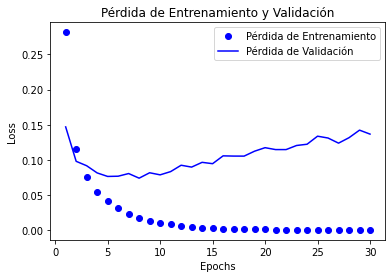

In [13]:
pinta_perdida_entrenamiento_validacion(historia0)

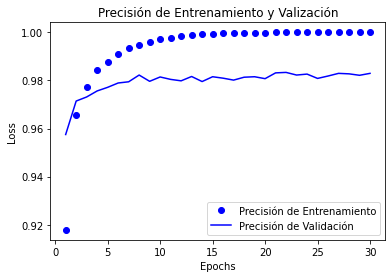

In [14]:
pinta_precision_entrenamiento_validacion(historia0)

### Caso 1: Con regularizador l1

In [15]:
network1 = crea_modelo(1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [16]:
network1 = compila_modelo(network1)

In [17]:
historia1 = entrena_modelo(network1)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 2.1212 - accuracy: 0.8462 - val_loss: 0.9982 - val_accuracy: 0.8843
Epoch 2/30
391/391 [==============================] - 1s 4ms/step - loss: 0.9510 - accuracy: 0.8826 - val_loss: 0.8901 - val_accuracy: 0.8934
Epoch 3/30
391/391 [==============================] - 1s 4ms/step - loss: 0.8255 - accuracy: 0.9049 - val_loss: 0.7738 - val_accuracy: 0.9202
Epoch 4/30
391/391 [==============================] - 1s 4ms/step - loss: 0.7535 - accuracy: 0.9168 - val_loss: 0.7068 - val_accuracy: 0.9358
Epoch 5/30
391/391 [==============================] - 1s 4ms/step - loss: 0.7069 - accuracy: 0.9244 - val_loss: 0.6727 - val_accuracy: 0.9396
Epoch 6/30
391/391 [==============================] - 2s 4ms/step - loss: 0.6694 - accuracy: 0.9324 - val_loss: 0.6694 - val_accuracy: 0.9251
Epoch 7/30
391/391 [==============================] - 2s 4ms/step - loss: 0.6421 - accuracy: 0.9347 - val_loss: 0.6134 - val_accuracy: 0.9457
Epoch 

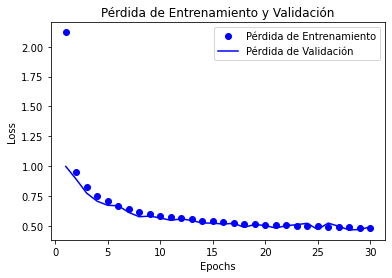

In [18]:
pinta_perdida_entrenamiento_validacion(historia1)

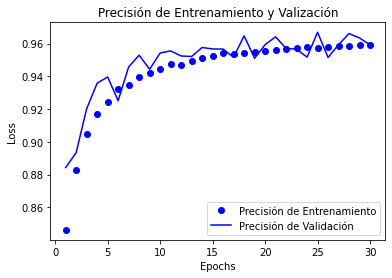

In [19]:
pinta_precision_entrenamiento_validacion(historia1)

### Caso 2: Con regularizador l2

In [20]:
network2 = crea_modelo(2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [21]:
network2 = compila_modelo(network2)

In [22]:
historia2 = entrena_modelo(network2)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 0.5256 - accuracy: 0.9123 - val_loss: 0.3824 - val_accuracy: 0.9254
Epoch 2/30
391/391 [==============================] - 1s 3ms/step - loss: 0.2650 - accuracy: 0.9542 - val_loss: 0.2395 - val_accuracy: 0.9564
Epoch 3/30
391/391 [==============================] - 1s 4ms/step - loss: 0.2119 - accuracy: 0.9623 - val_loss: 0.1898 - val_accuracy: 0.9696
Epoch 4/30
391/391 [==============================] - 2s 4ms/step - loss: 0.1857 - accuracy: 0.9673 - val_loss: 0.1810 - val_accuracy: 0.9708
Epoch 5/30
391/391 [==============================] - 1s 3ms/step - loss: 0.1732 - accuracy: 0.9700 - val_loss: 0.1780 - val_accuracy: 0.9661
Epoch 6/30
391/391 [==============================] - 2s 4ms/step - loss: 0.1652 - accuracy: 0.9713 - val_loss: 0.1619 - val_accuracy: 0.9724
Epoch 7/30
391/391 [==============================] - 1s 3ms/step - loss: 0.1576 - accuracy: 0.9722 - val_loss: 0.1946 - val_accuracy: 0.9610
Epoch 

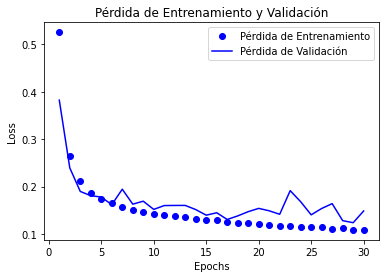

In [23]:
pinta_perdida_entrenamiento_validacion(historia2)

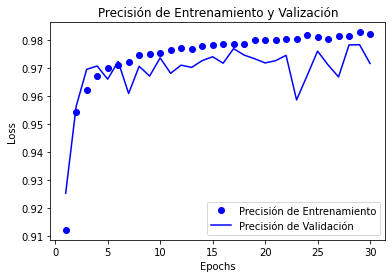

In [24]:
pinta_precision_entrenamiento_validacion(historia2)

### Caso 3: Con regularizador l1_l2

In [25]:
network3 = crea_modelo(3)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [26]:
network3 = compila_modelo(network3)

In [27]:
historia3 = entrena_modelo(network3)

Epoch 1/30
391/391 [==============================] - 2s 5ms/step - loss: 2.1747 - accuracy: 0.8423 - val_loss: 1.0530 - val_accuracy: 0.8749
Epoch 2/30
391/391 [==============================] - 2s 4ms/step - loss: 0.9772 - accuracy: 0.8776 - val_loss: 0.9077 - val_accuracy: 0.8923
Epoch 3/30
391/391 [==============================] - 1s 4ms/step - loss: 0.8599 - accuracy: 0.8968 - val_loss: 0.7831 - val_accuracy: 0.9233
Epoch 4/30
391/391 [==============================] - 1s 3ms/step - loss: 0.7833 - accuracy: 0.9113 - val_loss: 0.7947 - val_accuracy: 0.9045
Epoch 5/30
391/391 [==============================] - 1s 3ms/step - loss: 0.7315 - accuracy: 0.9218 - val_loss: 0.6976 - val_accuracy: 0.9256
Epoch 6/30
391/391 [==============================] - 1s 3ms/step - loss: 0.6946 - accuracy: 0.9273 - val_loss: 0.6508 - val_accuracy: 0.9408
Epoch 7/30
391/391 [==============================] - 1s 3ms/step - loss: 0.6679 - accuracy: 0.9313 - val_loss: 0.6530 - val_accuracy: 0.9344
Epoch 

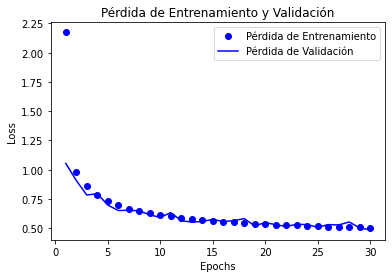

In [28]:
pinta_perdida_entrenamiento_validacion(historia3)

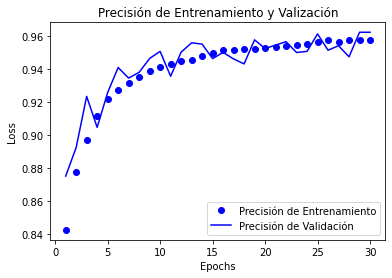

In [29]:
pinta_precision_entrenamiento_validacion(historia3)

### Caso 4: Con Droput

In [30]:
network4 = crea_modelo(4)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [31]:
network4 = compila_modelo(network4)

In [32]:
historia4 = entrena_modelo(network4)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 0.3442 - accuracy: 0.8996 - val_loss: 0.1590 - val_accuracy: 0.9554
Epoch 2/30
391/391 [==============================] - 2s 4ms/step - loss: 0.1681 - accuracy: 0.9498 - val_loss: 0.1205 - val_accuracy: 0.9645
Epoch 3/30
391/391 [==============================] - 1s 3ms/step - loss: 0.1248 - accuracy: 0.9624 - val_loss: 0.0967 - val_accuracy: 0.9722
Epoch 4/30
391/391 [==============================] - 1s 3ms/step - loss: 0.1060 - accuracy: 0.9679 - val_loss: 0.0918 - val_accuracy: 0.9748
Epoch 5/30
391/391 [==============================] - 1s 4ms/step - loss: 0.0922 - accuracy: 0.9724 - val_loss: 0.0891 - val_accuracy: 0.9751
Epoch 6/30
391/391 [==============================] - 2s 4ms/step - loss: 0.0800 - accuracy: 0.9767 - val_loss: 0.0830 - val_accuracy: 0.9777
Epoch 7/30
391/391 [==============================] - 1s 3ms/step - loss: 0.0744 - accuracy: 0.9777 - val_loss: 0.0800 - val_accuracy: 0.9785
Epoch 

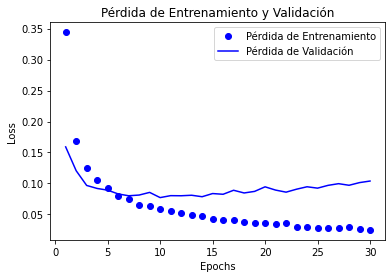

In [33]:
pinta_perdida_entrenamiento_validacion(historia4)

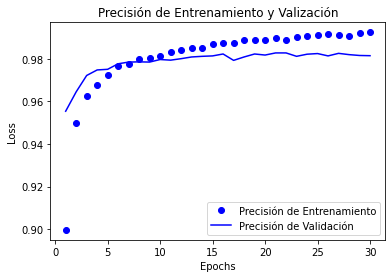

In [34]:
pinta_precision_entrenamiento_validacion(historia4)

### Caso 5: Error de código de regularizador

In [37]:
network5 = crea_modelo(5)

Error:Regularizador debe ser un número del 0 al 4


### CONCLUSIONES

Para el primer caso,sin regularizador,se puede observar que en el modelo tanto la pérdida como la precisión de los datos de entrenamiento con respecto a los datos son bastante distantes.Sobre la época 5,ambas gráficas se separan (se sobreentrena).El mejor dato de precisión lo obtenemos sobre la época 22 (0.9833).

Cuando aplicamos el regularizador `l1`, obtenemos una relación con la pérdida bastante buena;aunque en el caso de la precisión no es igual.Pese a que no son iguales,es cierto que no se separan tan bruscamente como con el caso anterior.Alcanzamos el mejor valor de precisión en la época 25 (0.9669).

Si aplicamos el regularizador `l2`,las gráficas son bastante inestables.Tanto los datos de pérdida como de precisión no presentan un comportamiento constante, ya sea en aumento o en descenso.Alcanzamos el mejor valor de precisión en la época 29(0.9784).

En el caso de aplicar `l1` y `l2`,encontramos que en la gráfica de la pérdida ambas curvas se ajustan muy precisamente. En el caso de la precisión, vemos que las curvas se separan aunque no de una manera constante.Alcanzamos el mejor valor de precisión en la época 29-30 (0.9622).

Finalmente,si obervamos qué ocurre al aplicar `dropout`;vemos que tanto en la pérdida como en la precisión el modelo llega a sobreentrenarse sobre la época 10.Esto se puede ver tanto en las gráficas (ambas curvas se separan sobre la época 10), como al entrenar el modelo(los datos comienzan a dispararse).Alcanzamos el mejor valor de precisión sobre la época 22 (0.9828).

Por esto, concluimos que el mejor regularizador es el `dropout`.

